In [3]:
# 1


import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [27]:
X = np.array([[2,3],[1,1],[4,5]])
y = np.array([1,-1,1])

In [26]:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)

In [24]:
# Ensure perceptron exists (create & fit if cell that defines it wasn't run)
if 'perceptron' not in globals():
	perceptron = Perceptron(eta=0.1, n_iter=10)
	perceptron.fit(X, y)

book = np.array([[3, 2]])  # Make input 2D for predict
prediction = perceptron.predict(book)
print("Prediction for book [3,2]:", prediction[0])

Prediction for book [3,2]: -1


In [25]:
# --- Print errors per epoch ---
print("Errors per epoch:", perceptron.errors_)

# --- Total errors ---
total_errors = sum(perceptron.errors_)
print("Total errors across 10 epochs:", total_errors)

Errors per epoch: [50, 50, 51, 50, 50, 50, 50, 50, 50, 50]
Total errors across 10 epochs: 501


In [28]:
# 2

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100, [2,3]]
y = iris.target[:100]

lr = LogisticRegression().fit(X, y)
svm = SVC(kernel='linear').fit(X, y)

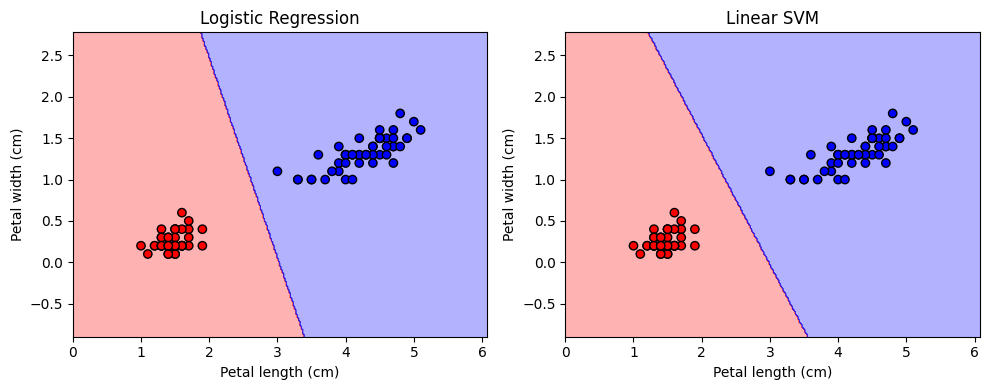

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict using both models
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
titles = ['Logistic Regression', 'Linear SVM']
Zs = [Z_lr, Z_svm]

for ax, Z, title in zip(axes, Zs, titles):
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)
    ax.set_xlabel('Petal length (cm)')
    ax.set_ylabel('Petal width (cm)')

plt.tight_layout()
plt.show()


In [20]:
# 4

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = np.array([[np.nan,'Fiction',200],
                 [25,'Non-fiction',150],
                 [30,'Fiction',np.nan]], dtype=object)

imputer = SimpleImputer(strategy='mean')
data[:,0] = imputer.fit_transform(data[:,0].reshape(-1,1)).ravel()

encoder = OneHotEncoder()
categories = encoder.fit_transform(data[:,1].reshape(-1,1)).toarray()

scaler = StandardScaler()
pages = scaler.fit_transform(data[:,2].reshape(-1,1))

In [29]:
#4 NO CODING REQUIRED 
print("Imputed Age Column:", data[:,0])
print("One-hot Encoded Categories:\n", categories)
print("Scaled Pages:\n", pages)

Imputed Age Column: [27.5 25.0 30.0]
One-hot Encoded Categories:
 [[1. 0.]
 [0. 1.]
 [1. 0.]]
Scaled Pages:
 [[ 1.]
 [-1.]
 [nan]]


In [33]:
#5
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)


In [12]:
# 6 NO NEED TO CODE 

In [19]:
# 7.1

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

wine = load_wine()
rf = RandomForestClassifier().fit(wine.data, wine.target)
ada = AdaBoostClassifier().fit(wine.data, wine.target)
print("Random Forest Accuracy:", rf.score(wine.data, wine.target))
print("AdaBoost Accuracy:", ada.score(wine.data, wine.target))


Random Forest Accuracy: 1.0
AdaBoost Accuracy: 1.0


In [14]:
# 8 from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
docs = ["I loved the book", "Terrible story", "Amazing characters"]
y = [1,0,1]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(docs)

clf = LogisticRegression().fit(X,y)
print(clf.predict(tfidf.transform(["The book was good"])))

[1]


In [15]:
#9

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

print("Data loaded successfully", flush=True)
print(f"Data shape: {X.shape}", flush=True)

# Linear Regression (fast)
print("Training Linear Regression...", flush=True)
lr = LinearRegression().fit(X, y)
lr_mse = mean_squared_error(y, lr.predict(X))
lr_rmse = np.sqrt(lr_mse)  # Manual calculation of RMSE
print("LR RMSE:", lr_rmse, flush=True)

# Random Forest (can be slow)
print("Training Random Forest... (this may take a while)", flush=True)
rf = RandomForestRegressor(n_estimators=10, random_state=42)  # Reduced for speed
rf.fit(X, y)
rf_mse = mean_squared_error(y, rf.predict(X))
rf_rmse = np.sqrt(rf_mse)  # Manual calculation of RMSE
print("RF RMSE:", rf_rmse, flush=True)

print("Script completed!", flush=True)

Data loaded successfully
Data shape: (20640, 8)
Training Linear Regression...
LR RMSE: 0.7241001216576387
Training Random Forest... (this may take a while)
RF RMSE: 0.2237251686447155
Script completed!


In [31]:
#10
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data  # Ensure X is defined for KMeans

# Perform K-means clustering
km = KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)

# Print first 10 cluster labels
print(km.labels_[:10])

[1 1 1 1 1 1 1 1 1 1]
